# 음주 여부에 따라 건강검진 수치 차이가 있을까?

# 신장과 허리둘레의 크기는 체중과 상관관계가 있을까?
- 분석을 통해 가설을 검정

# 라이브러리 로드

In [1]:
# 분석에 사용할 pandas, 수치계산에 사용할 numpy, 시각화에 사용할 seaborn
# 주피터 노트북 구버전에서는 %matplotlib inline 설정을 해야 노트북 안에서 그래프 시각화 가능

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
plt.rc("font", family="Malgun Gothic")
# 마이너스 폰트 깨지는 문제 대처
plt.rc("axes", unicode_minus=False)
# 글씨 선명하게 보기
%config InlineBackend.figure_format = 'retina'

# 데이터 불러오기
- 건강검진정보
- 공공데이터(https://www.data.go.kr/data/15007122/fileData.do)

In [3]:
# 파일 읽어온 후 shape로 행과 열 출력
df = pd.read_csv("data/국민건강보험공단_건강검진정보_20191231.csv", encoding='cp949')
df.shape

(1000000, 34)

## 데이터 미리보기

In [4]:
# sample, head, tail
df.head()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치 유무,치아마모증유무,제3대구치(사랑니) 이상,치석,데이터 공개일자
0,2019,1,11,1,13,165,65,90.0,1.5,1.2,...,47.0,2.0,NaN,1,0.0,미시행,미시행,미시행,1.0,20191231
1,2019,2,48,2,5,155,45,64.0,1.2,0.5,...,13.0,1.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
2,2019,3,41,1,13,160,70,87.0,0.9,0.8,...,17.0,1.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
3,2019,4,28,1,12,170,60,85.0,0.4,1.2,...,32.0,2.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
4,2019,5,41,1,10,170,70,81.2,0.7,0.7,...,19.0,2.0,NaN,0,NaN,미시행,미시행,미시행,NaN,20191231


In [5]:
# 아무거나 1개 가져온다.
df.sample()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치 유무,치아마모증유무,제3대구치(사랑니) 이상,치석,데이터 공개일자
582643,2019,582644,29,1,11,180,95,92.0,0.7,0.6,...,60.0,2.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231


In [6]:
df.tail()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치 유무,치아마모증유무,제3대구치(사랑니) 이상,치석,데이터 공개일자
999995,2019,999996,41,1,12,170,65,80.0,1.0,1.2,...,21.0,1.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
999996,2019,999997,11,1,9,170,55,75.0,0.9,0.8,...,27.0,2.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
999997,2019,999998,45,1,13,160,65,92.3,1.0,0.9,...,84.0,2.0,1.0,1,0.0,미시행,미시행,미시행,0.0,20191231
999998,2019,999999,30,1,8,170,75,85.0,0.8,0.8,...,29.0,2.0,1.0,1,0.0,미시행,미시행,미시행,0.0,20191231
999999,2019,1000000,11,2,10,155,65,86.0,0.5,0.5,...,9.0,1.0,NaN,1,0.0,미시행,미시행,미시행,1.0,20191231


# 기본 정보 보기

In [7]:
# 데이터의 크기, 형식, 메모리 사용량 등
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   기준년도           1000000 non-null  int64  
 1   가입자 일련번호       1000000 non-null  int64  
 2   시도코드           1000000 non-null  int64  
 3   성별코드           1000000 non-null  int64  
 4   연령대 코드(5세단위)   1000000 non-null  int64  
 5   신장(5Cm단위)      1000000 non-null  int64  
 6   체중(5Kg 단위)     1000000 non-null  int64  
 7   허리둘레           999597 non-null   float64
 8   시력(좌)          999805 non-null   float64
 9   시력(우)          999812 non-null   float64
 10  청력(좌)          999819 non-null   float64
 11  청력(우)          999822 non-null   float64
 12  수축기 혈압         994576 non-null   float64
 13  이완기 혈압         994575 non-null   float64
 14  식전혈당(공복혈당)     994477 non-null   float64
 15  총 콜레스테롤        333549 non-null   float64
 16  트리글리세라이드       333544 non-null   float64
 17  HDL 콜레스테롤

In [8]:
# 컬럼만 출력
df.columns

Index(['기준년도', '가입자 일련번호', '시도코드', '성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압',
       '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치 유무', '치아마모증유무', '제3대구치(사랑니) 이상',
       '치석', '데이터 공개일자'],
      dtype='object')

In [9]:
# dtypes를 통해 데이터 타입 출력
df.dtypes

기준년도               int64
가입자 일련번호           int64
시도코드               int64
성별코드               int64
연령대 코드(5세단위)       int64
신장(5Cm단위)          int64
체중(5Kg 단위)         int64
허리둘레             float64
시력(좌)            float64
시력(우)            float64
청력(좌)            float64
청력(우)            float64
수축기 혈압           float64
이완기 혈압           float64
식전혈당(공복혈당)       float64
총 콜레스테롤          float64
트리글리세라이드         float64
HDL 콜레스테롤        float64
LDL 콜레스테롤        float64
혈색소              float64
요단백              float64
혈청크레아티닌          float64
(혈청지오티)AST       float64
(혈청지오티)ALT       float64
감마 지티피           float64
흡연상태             float64
음주여부             float64
구강검진 수검여부          int64
치아우식증유무          float64
결손치 유무            object
치아마모증유무           object
제3대구치(사랑니) 이상     object
치석               float64
데이터 공개일자           int64
dtype: object

# 결측치보기

In [10]:
# isnull을 통해 결측치를 bool 값으로 표시하고 sum을 하면 컬람마다의 결측치 수를 세어준다.
df.isnull().sum()

기준년도                  0
가입자 일련번호              0
시도코드                  0
성별코드                  0
연령대 코드(5세단위)          0
신장(5Cm단위)             0
체중(5Kg 단위)            0
허리둘레                403
시력(좌)               195
시력(우)               188
청력(좌)               181
청력(우)               178
수축기 혈압             5424
이완기 혈압             5425
식전혈당(공복혈당)         5523
총 콜레스테롤          666451
트리글리세라이드         666456
HDL 콜레스테롤        666459
LDL 콜레스테롤        672852
혈색소                5532
요단백               10306
혈청크레아티닌            5526
(혈청지오티)AST         5522
(혈청지오티)ALT         5523
감마 지티피             5530
흡연상태                166
음주여부             355082
구강검진 수검여부             0
치아우식증유무          602320
결손치 유무                0
치아마모증유무               0
제3대구치(사랑니) 이상         0
치석               602320
데이터 공개일자              0
dtype: int64

In [11]:
# isna로도 결측치 여부 확인 가능
df.isna().sum()

기준년도                  0
가입자 일련번호              0
시도코드                  0
성별코드                  0
연령대 코드(5세단위)          0
신장(5Cm단위)             0
체중(5Kg 단위)            0
허리둘레                403
시력(좌)               195
시력(우)               188
청력(좌)               181
청력(우)               178
수축기 혈압             5424
이완기 혈압             5425
식전혈당(공복혈당)         5523
총 콜레스테롤          666451
트리글리세라이드         666456
HDL 콜레스테롤        666459
LDL 콜레스테롤        672852
혈색소                5532
요단백               10306
혈청크레아티닌            5526
(혈청지오티)AST         5522
(혈청지오티)ALT         5523
감마 지티피             5530
흡연상태                166
음주여부             355082
구강검진 수검여부             0
치아우식증유무          602320
결손치 유무                0
치아마모증유무               0
제3대구치(사랑니) 이상         0
치석               602320
데이터 공개일자              0
dtype: int64

<AxesSubplot:>

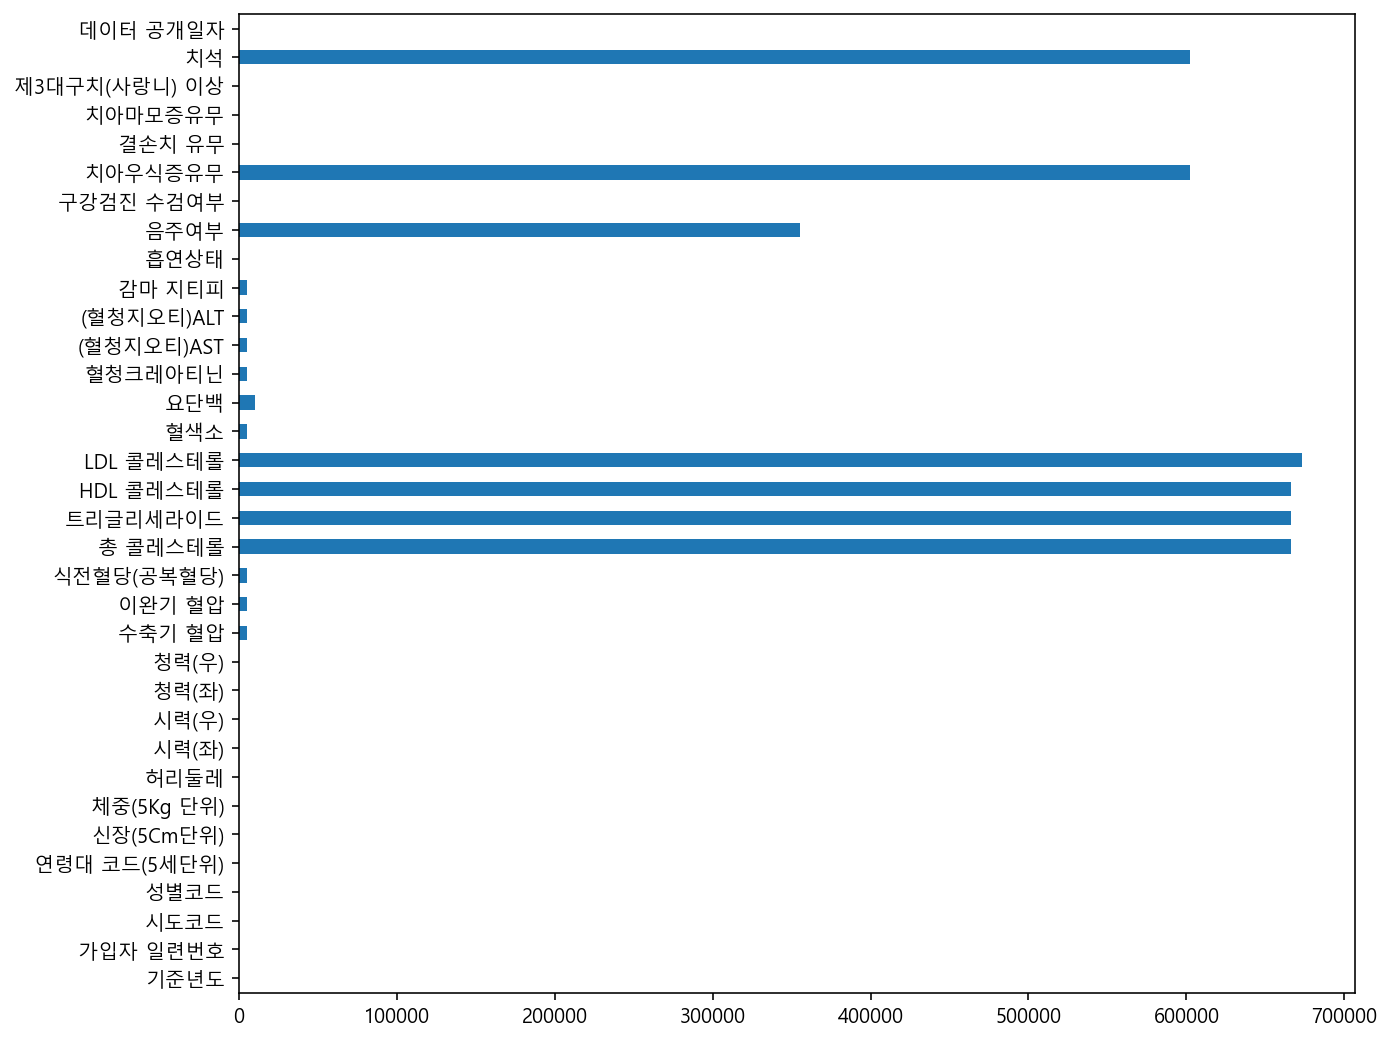

In [12]:
# 판다스에 내장 된 plot을 통해 시각화
df.isnull().sum().plot.barh(figsize=(10,9))

# 일부 데이터 요약하기

In [13]:
df.columns

Index(['기준년도', '가입자 일련번호', '시도코드', '성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압',
       '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치 유무', '치아마모증유무', '제3대구치(사랑니) 이상',
       '치석', '데이터 공개일자'],
      dtype='object')

In [14]:
# 대괄호 하나일 때는 series
df["(혈청지오티)ALT"]
# 대괄호 여러개일땐 dataframe형태
df[["(혈청지오티)ALT"]]

,(혈청지오티)ALT
0,32.0
1,8.0
2,21.0
3,19.0
4,24.0
...,...
999995,23.0
999996,15.0
999997,28.0
999998,65.0


In [15]:
# 여러 컬럼 가져와서 미릭보기
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].head()

,(혈청지오티)ALT,(혈청지오티)AST
0,32.0,18.0
1,8.0,15.0
2,21.0,30.0
3,19.0,17.0
4,24.0,19.0


In [16]:
# 요약
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   (혈청지오티)ALT  994477 non-null  float64
 1   (혈청지오티)AST  994478 non-null  float64
dtypes: float64(2)
memory usage: 15.3 MB


In [17]:
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].describe()

,(혈청지오티)ALT,(혈청지오티)AST
count,994477.000000,994478.000000
mean,25.996708,26.231107
std,27.710895,24.046478
min,1.000000,1.000000
25%,15.000000,19.000000
50%,20.000000,23.000000
75%,30.000000,29.000000
max,6435.000000,7362.000000


# value_counts로 값 집계하기

In [18]:
df["성별코드"].value_counts()
# 남성이 더 많다

1    519574
2    480426
Name: 성별코드, dtype: int64

In [19]:
df["흡연상태"].value_counts()

1.0    630226
2.0    369608
Name: 흡연상태, dtype: int64

# groupby 와 pivot_table 사용하기